In [4]:

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('classic')

In [5]:
#locating the clean csv files to use
icu_plot ="../CleanCSV/clean_hospitals_by_count.csv"
county_plot = "../CleanCSV/County_Summary.csv"

In [6]:
#reading the csv file
icu_df = pd.read_csv(icu_plot)
county_df = pd.read_csv(county_plot)

#cleaning up county summary data
county_df['County'] = county_df['County'].str.rstrip()
#for i in icu_df['County']:
    #print(f'The length of {i} is {len(i)}.')
#combine the two data sets
relavent_df = pd.merge(icu_df, county_df, on="County", how="left")
#display the new data
relavent_df


,County,Date,Date.1,Confirmed Covid Patients,Suspected Covid Patinets,Confirmed Covid ICU Patients,ICU suspected COVID Patients,ICU Beds Available,Unnamed: 0,Population 2020,Population Quartiles,Total Cases,Total Cases(%)
0,Alameda,April,2020-04-30,93.0,106.0,46.0,26.0,197.0,0,1684000,Quartile 4,22546.0,0.013388
1,Alameda,August,2020-08-31,207.0,56.0,73.0,20.0,99.0,0,1684000,Quartile 4,22546.0,0.013388
2,Alameda,July,2020-07-31,213.0,82.0,65.0,13.0,151.0,0,1684000,Quartile 4,22546.0,0.013388
3,Alameda,June,2020-06-30,116.0,92.0,43.0,20.0,203.0,0,1684000,Quartile 4,22546.0,0.013388
4,Alameda,March,2020-03-31,59.0,94.0,27.0,18.0,146.0,0,1684000,Quartile 4,22546.0,0.013388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,Yuba,June,2020-06-30,8.0,1.0,3.0,0.0,19.0,57,80573,Quartile 2,1176.0,0.014595
435,Yuba,March,2020-03-31,3.0,21.0,2.0,4.0,10.0,57,80573,Quartile 2,1176.0,0.014595
436,Yuba,May,2020-05-31,1.0,1.0,0.0,1.0,13.0,57,80573,Quartile 2,1176.0,0.014595
437,Yuba,October,2020-10-16,11.0,1.0,3.0,0.0,16.0,57,80573,Quartile 2,1176.0,0.014595


In [7]:
#Droping uneeded columns and keeping quartiles
quart_df = relavent_df.drop(columns= ['ICU suspected COVID Patients','Confirmed Covid Patients', 'Suspected Covid Patinets','Unnamed: 0', 
                                      'Population 2020', 'Total Cases','Total Cases(%)','Date.1'])
#Renaming Date to month
quartile_df = quart_df.rename(columns={"Date": "Month"})
quartile_df

,County,Month,Confirmed Covid ICU Patients,ICU Beds Available,Population Quartiles
0,Alameda,April,46.0,197.0,Quartile 4
1,Alameda,August,73.0,99.0,Quartile 4
2,Alameda,July,65.0,151.0,Quartile 4
3,Alameda,June,43.0,203.0,Quartile 4
4,Alameda,March,27.0,146.0,Quartile 4
...,...,...,...,...,...
434,Yuba,June,3.0,19.0,Quartile 2
435,Yuba,March,2.0,10.0,Quartile 2
436,Yuba,May,0.0,13.0,Quartile 2
437,Yuba,October,3.0,16.0,Quartile 2


In [8]:
# calculates percent of ICU Covid cases to ICU beds available
quartile_df['Bed Occupied Covid(%)'] = quartile_df['Confirmed Covid ICU Patients'] / quartile_df['ICU Beds Available']
quartile_df

,County,Month,Confirmed Covid ICU Patients,ICU Beds Available,Population Quartiles,Bed Occupied Covid(%)
0,Alameda,April,46.0,197.0,Quartile 4,0.233503
1,Alameda,August,73.0,99.0,Quartile 4,0.737374
2,Alameda,July,65.0,151.0,Quartile 4,0.430464
3,Alameda,June,43.0,203.0,Quartile 4,0.211823
4,Alameda,March,27.0,146.0,Quartile 4,0.184932
...,...,...,...,...,...,...
434,Yuba,June,3.0,19.0,Quartile 2,0.157895
435,Yuba,March,2.0,10.0,Quartile 2,0.200000
436,Yuba,May,0.0,13.0,Quartile 2,0.000000
437,Yuba,October,3.0,16.0,Quartile 2,0.187500


In [9]:
# calculates average monthly percent total cases per quartile
icu_avg = quartile_df.groupby(['Population Quartiles', quartile_df['Month']]).mean()
icu_avg = icu_avg.reindex(['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October'], level=1)
icu_avg = icu_avg.drop(columns= ['Confirmed Covid ICU Patients', 'ICU Beds Available'])
icu_avg = icu_avg.reset_index()
icu_avg['Bed Occupied Covid(%)'] = icu_avg['Bed Occupied Covid(%)'].multiply(100)
icu_avg

,Population Quartiles,Month,Bed Occupied Covid(%)
0,Quartile 1,March,0.000000
1,Quartile 1,April,4.761905
2,Quartile 1,May,3.571429
3,Quartile 1,June,9.523810
4,Quartile 1,July,20.146520
5,Quartile 1,August,39.145299
6,Quartile 1,September,9.027778
7,Quartile 1,October,4.166667
8,Quartile 2,March,21.681460
9,Quartile 2,April,31.544289


In [10]:
# separates quartile_monthly_avg into individual dfs for each quartile
quartile1 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 1'])]
quartile2 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 2'])]
quartile3 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 3'])]
quartile4 = icu_avg[icu_avg['Population Quartiles'].isin(['Quartile 4'])]
quartile4

,Population Quartiles,Month,Bed Occupied Covid(%)
24,Quartile 4,March,34.778430
25,Quartile 4,April,29.304759
26,Quartile 4,May,27.733564
27,Quartile 4,June,37.611448
28,Quartile 4,July,60.862778
29,Quartile 4,August,87.399491
30,Quartile 4,September,49.253480
31,Quartile 4,October,27.317559


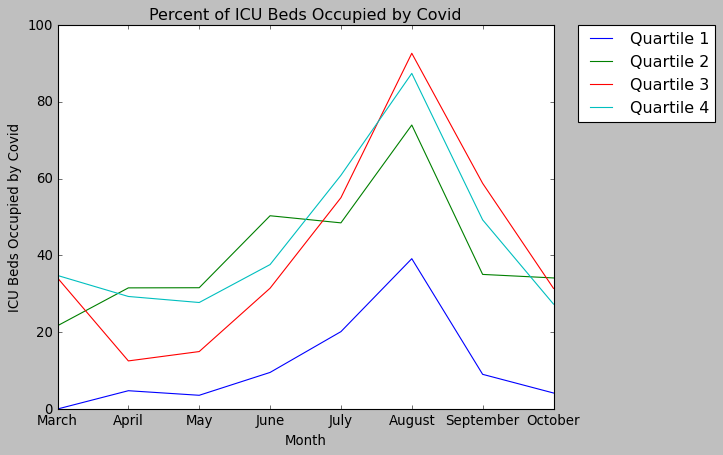

In [17]:
# Generate a line  to show the percent of Beds being Occupied by Covid Patients per Quartile
plt.plot(quartile1["Month"], quartile1["Bed Occupied Covid(%)"], label='Quartile 1')
plt.plot(quartile2["Month"], quartile2["Bed Occupied Covid(%)"], label='Quartile 2')
plt.plot(quartile3["Month"], quartile3["Bed Occupied Covid(%)"], label='Quartile 3')
plt.plot(quartile4["Month"], quartile4["Bed Occupied Covid(%)"], label='Quartile 4')
plt.title("Percent of ICU Beds Occupied by Covid")
plt.xlabel("Month")
plt.ylabel("ICU Beds Occupied by Covid")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [16]:
#saving the graph as a png
plt.savefig("../PNG/Percent of ICU Beds Occupied by Covid")

<Figure size 640x480 with 0 Axes>